In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import folium
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**Dataframe Preparation**

In [46]:
food = pd.read_pickle("food.pkl")
restaurants = pd.read_pickle("restaurants.pkl")

In [47]:
food.head()

,Inspection ID,AKA Name,License #,Facility Type,Risk,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2320830,"THE HOXTON, CHICAGO",2694640.0,Restaurant,Risk 2 (Medium),2019,License,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.885699,-87.648789
1,2320831,OGDEN PLAZA INC.,2475982.0,Grocery Store,Risk 3 (Low),2019,Canvass,Out of Business,NaN,41.855266,-87.712402
2,2320795,THE EXCHANGE,2698572.0,Restaurant,Risk 1 (High),2019,License,Pass,NaN,41.887529,-87.632647
3,2320768,The Manor,22971.0,Restaurant,Risk 1 (High),2019,Canvass,No Entry,NaN,41.807924,-87.728164
4,2320719,"4884 S ARCHER INC,.",2678088.0,Grocery Store,Risk 3 (Low),2019,License,Fail,NaN,41.804621,-87.719907


In [48]:
restaurants["Facility Type"].unique().tolist()

['Restaurant']

**Risk analysis:**

1) Pourcentage de 1, 2 et 3 sur chaque année

2) Différences niveaux pour même chaîne (lié à la position?)

3) Notes des chaînes/écoles

4) Distributions des notes par année

**1. Percentage distribution of risk level throughout the years** 

In [49]:
#risk distribution for every year
year_list = food["Inspection Date"].unique().tolist()
year_list.sort()
all_risks =  [[0 for _ in range(3)] for _ in range(len(year_list))]
year = 0
for i in year_list:
    all_risks[year] = food[food["Inspection Date"]==i].Risk.value_counts().sort_index().tail(3).tolist()
    year += 1

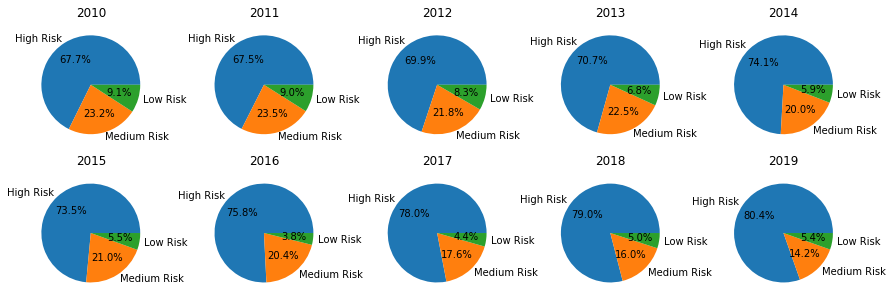

In [50]:
#plotting
labels = ['High Risk', 'Medium Risk', 'Low Risk']
fig, ax= plt.subplots(2,int(len(year_list)/2),figsize=(15,5))

year = 0
for i in range(2):
    for j in range(int(len(year_list)/2)):
        ax[i,j].pie(all_risks[year], labels = labels, autopct='%1.1f%%')
        ax[i,j].set_title(year_list[year])
        year += 1

plt.show()

**Discussion**

We see that the distribution of different risk levels has slowly changed since 2010. There is a slow increase in high risk aka fast foods 

**Risk analysis per restaurant for 2018**

In [51]:
new_restaurants = restaurants[restaurants["Inspection Date"]=='2018'].copy()
new_restaurants.reset_index(drop=True, inplace=True)

In [52]:
new_restaurants.head(10)

,Inspection ID,AKA Name,License #,Facility Type,Risk,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2243942,DUNKIN DONUTS,2536449.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.896458,-87.636098
1,2243941,DUNKIN DONUTS,23610.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.995853,-87.670347
2,2243922,SUBWAY,1947909.0,Restaurant,Risk 1 (High),2018,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.775287,-87.722819
3,2243903,SUBWAY,1980425.0,Restaurant,Risk 1 (High),2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.945599,-87.766599
4,2243876,SUBWAY,2221641.0,Restaurant,Risk 1 (High),2018,Canvass Re-Inspection,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.778859,-87.703405
5,2243885,MCDONALDS,2637057.0,Restaurant,Risk 2 (Medium),2018,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.808359,-87.696001
6,2243872,SUBWAY,1904894.0,Restaurant,Risk 1 (High),2018,Canvass,Out of Business,NaN,41.865676,-87.625944
7,2243828,SUBWAY,2374636.0,Restaurant,Risk 1 (High),2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.873925,-87.630803
8,2243844,STARBUCKS,1515016.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.867571,-87.630586
9,2243835,DUNKIN DONUTS,1986419.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.873997,-87.630806


**Plotting on the city map**

In [53]:
#Keeping Canvass inspections and dropping duplicates (keep the highest risk level given)
new_restaurants = new_restaurants[new_restaurants["Inspection Type"]=="Canvass"]
new_restaurants.sort_values(by = "Risk", inplace=True)
new_restaurants.drop_duplicates(subset="License #", inplace=True)
new_restaurants.reset_index(drop=True, inplace=True)
new_restaurants

,Inspection ID,AKA Name,License #,Facility Type,Risk,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2177048,SUBWAY,1959838.0,Restaurant,Risk 1 (High),2018,Canvass,Out of Business,NaN,41.886567,-87.624385
1,2166318,SUBWAY,1884292.0,Restaurant,Risk 1 (High),2018,Canvass,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",42.008536,-87.914428
2,2166345,SUBWAY,2158242.0,Restaurant,Risk 1 (High),2018,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.760632,-87.586333
3,2166387,SUBWAY,2391330.0,Restaurant,Risk 1 (High),2018,Canvass,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.884586,-87.631010
4,2166405,SUBWAY,2411733.0,Restaurant,Risk 1 (High),2018,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.813101,-87.723928
...,...,...,...,...,...,...,...,...,...,...,...
417,2166654,STARBUCKS,2363762.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,42.008536,-87.914428
418,2214118,DUNKIN DONUTS,1675002.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.975911,-87.787723
419,2167203,DUNKIN DONUTS,1913873.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.780103,-87.629719
420,2243942,DUNKIN DONUTS,2536449.0,Restaurant,Risk 2 (Medium),2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.896458,-87.636098


In [54]:
#An idea of statistics
new_restaurants.Risk.value_counts()

Risk 1 (High)      226
Risk 2 (Medium)    195
Risk 3 (Low)         1
Name: Risk, dtype: int64

In [81]:
#Function for plotting Chicago map with markers according to risk level
#Takes a dataframe and returns the map
def map_plot (df):
    #Creating the Chicago map
    chicago_coord = [41.85, -87.7]
    riskmap = folium.Map(location=chicago_coord)

    #Low risk
    for i in range(df[df.Risk.str.contains("3")].Latitude.shape[0]):
        risk_location = [df[df.Risk.str.contains("3")].Latitude.tolist()[i], 
                          df[df.Risk.str.contains("3")].Longitude.tolist()[i]]
        folium.Marker(risk_location, popup=df[df.Risk.str.contains("3")]["AKA Name"].tolist()[i], 
                      icon=folium.Icon(color ='blue', icon = 'map-marker')).add_to(riskmap)

    #Medium risk
    for i in range(df[df.Risk.str.contains("2")].Latitude.shape[0]):
        risk_location = [df[df.Risk.str.contains("2")].Latitude.tolist()[i], 
                          df[df.Risk.str.contains("2")].Longitude.tolist()[i]]
        folium.Marker(risk_location, popup=df[df.Risk.str.contains("2")]["AKA Name"].tolist()[i], 
                      icon=folium.Icon(color ='orange', icon = 'map-marker')).add_to(riskmap)

    #High risk
    for i in range(df[df.Risk.str.contains("1")].Latitude.shape[0]):
        risk_location = [df[df.Risk.str.contains("1")].Latitude.tolist()[i], 
                          df[df.Risk.str.contains("1")].Longitude.tolist()[i]]
        folium.Marker(risk_location, popup=df[df.Risk.str.contains("1")]["AKA Name"].tolist()[i], 
                      icon=folium.Icon(color ='red', icon = 'map-marker')).add_to(riskmap)
        
    return riskmap

In [82]:
#Plotting restaurants from 2018 with colors according to risk level
m = map_plot(new_restaurants.copy())
m

**Risk level Analysis for schools**

In [101]:
#Creation of a dataframe containing only schools from 2018 without duplicates (keep the highest risk level)
schools = food[food["Facility Type"]=='School'].copy()
schools = schools[schools["Inspection Date"]=='2018']
schools = schools[schools["Inspection Type"]=="Canvass"]
schools.sort_values(by = "Risk", inplace=True)
schools.drop_duplicates(subset="License #", inplace =True)
schools.reset_index(drop=True,inplace=True)
schools["AKA Name"] = schools["AKA Name"].str.upper()
schools.head()

,Inspection ID,AKA Name,License #,Facility Type,Risk,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2243547,EBINGER ELEMENTARY SCHOOL,23051.0,School,Risk 1 (High),2018,Canvass,Pass,NaN,42.004436,-87.811164
1,2146146,URBAN PREP (CS) AT ENGLEWOOD,66441.0,School,Risk 1 (High),2018,Canvass,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.781493,-87.634942
2,2146178,COOPER ELEMENTARY SOUTH,22831.0,School,Risk 1 (High),2018,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.856058,-87.667248
3,2146050,JAMES WELDON JOHNSON SCHOOL,26231.0,School,Risk 1 (High),2018,Canvass,Fail,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.861840,-87.703176
4,2146030,ST. LUKE ACADEMY,1878515.0,School,Risk 1 (High),2018,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.939838,-87.666366


In [99]:
#preview of risk level distribution
schools.Risk.value_counts()

Risk 1 (High)      745
Risk 2 (Medium)     76
Risk 3 (Low)        20
Name: Risk, dtype: int64

The total number of schools is very large due to school being a vast term, we are going to concentrate on highschools

In [106]:
school_map = map_plot(schools[schools["AKA Name"].str.contains("HIGH")])
school_map

In [107]:
schools[schools["AKA Name"].str.contains("HIGH")].Risk.value_counts()

Risk 1 (High)      46
Risk 2 (Medium)     6
Risk 3 (Low)        2
Name: Risk, dtype: int64